In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [104]:
df = pd.read_csv("fcc-forum-pageviews.csv")
df = df.set_index('date')
df.sort_values(by=['value'])

,value
date,
2016-05-09,1201
2016-05-11,1716
2016-05-10,2329
2016-05-16,2591
2016-05-15,2927
...,...
2019-11-15,314101
2019-08-06,337325
2019-08-07,341595


In [105]:
import plotly.express as px
fig = px.histogram(df, 'value')
fig.show()

In [106]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) &
             (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


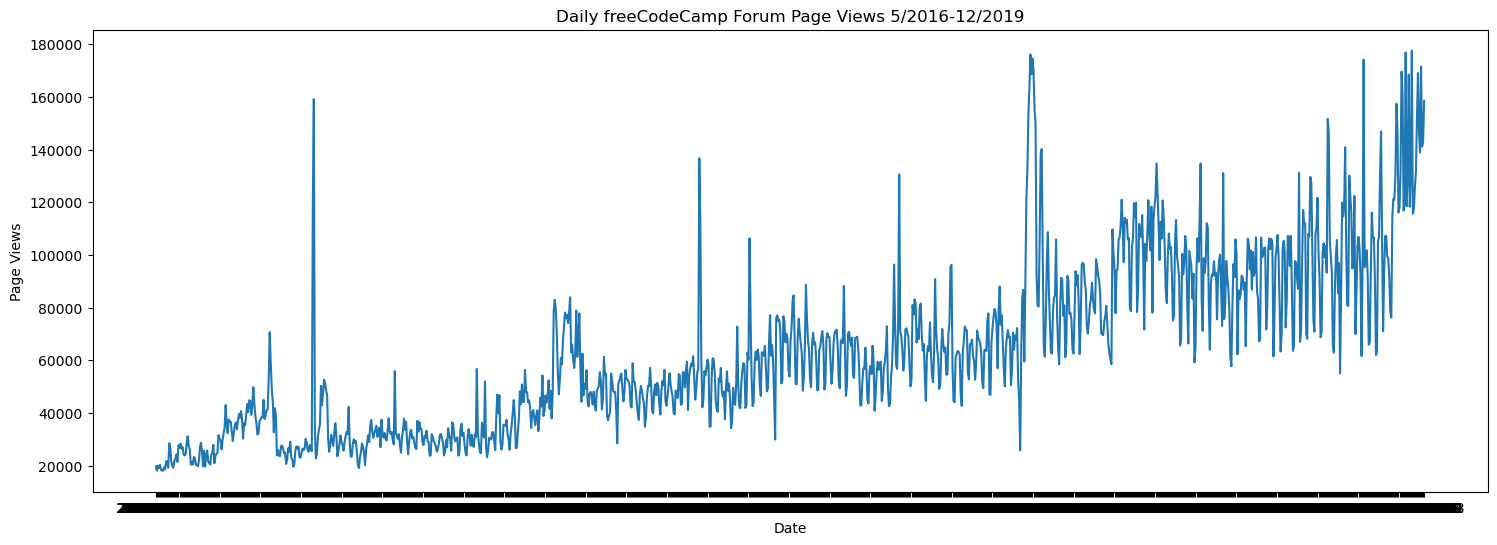

In [107]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize= (18,6))
    ax = sns.lineplot(data= df, x= 'date', y= 'value')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
draw_line_plot()

In [134]:
df2 = df.copy()
df2.index = pd.to_datetime(df.index).sort_values()
df2['year'] = df2.index.year
df2['month'] = df2.index.month
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2['month'] = df2['month'].map(lambda x: month_names[x-1])

df_bar = df2.groupby(['year', 'month'])['value'].mean().unstack()
df_bar

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,24109.678571,21875.105263,NaN,19432.400000,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


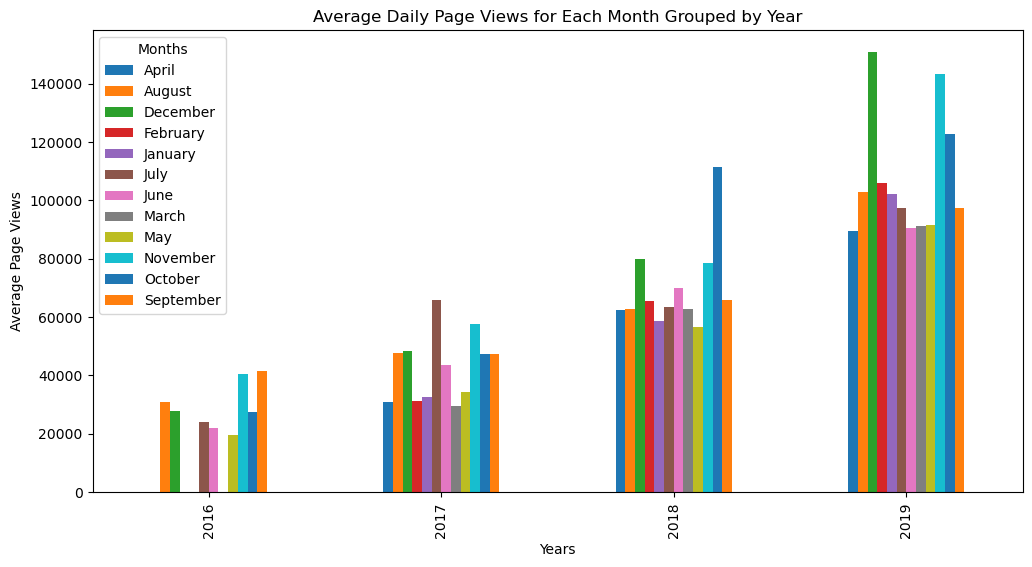

In [135]:
def draw_bar_plot():
    ax = df_bar.plot(kind='bar', figsize=(12,6))
    ax.set_title('Average Daily Page Views for Each Month Grouped by Year')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months', labels=df_bar.columns)
    plt.show()
draw_bar_plot()

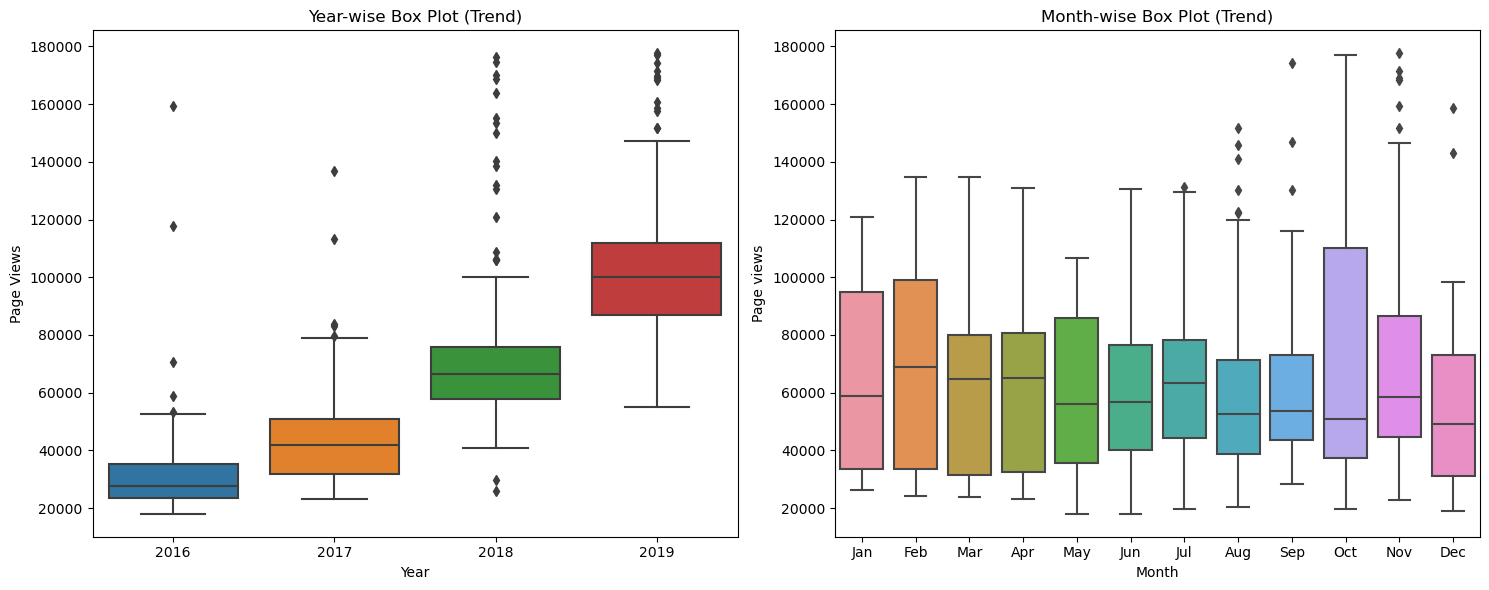

In [137]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    fig, axes = plt.subplots(1, 2, figsize=(15,6))
    sns.boxplot(x='year', y='value', data= df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x='month', y='value', data= df_box, ax=axes[1], order = month_order)
    axes[1].set_title('Month-wise Box Plot (Trend)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page views')
    
    plt.tight_layout()
    plt.show()
   
draw_box_plot()
